# RFM_Customer_Segmentation

########### Variables##########

master_id = Unique customer id

order_channel = Which platform used for shopping (Android, ios, Desktop, Mobile)

last_order_channel = Platform used for the last shopping activity

first_order_date = First order date of the customer

last_order_date = Last order date of the customer

last_order_date_online = Last online order date of the customer

last_order_date_offline = Last offline order date of the customer

order_num_total_ever_online= Number of unique online orders customer have made

order_num_total_ever_offline = Number of unique offline orders customer have made

customer_value_total_ever_offline = Amount of money paid by customer for offline orders

customer_value_total_ever_online = Amount of money paid by customer for online orders

interested_in_categories_12 = Categories in which customer has shopped from for the last 12 months

In [10]:
#Understanding and Preparation of Data
import datetime as dt
import pandas as pd
import seaborn as sns

In [11]:
#Firstly, let's read our data and make a copy of it so that we won't have to read the data each time we want the original data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_ = pd.read_csv("/Users/yurtcanmustafa/Desktop/DataScience//flo_data_20k.csv")
df = df_.copy()

In [12]:
#Number of columns and rows
df.shape

(19945, 12)

In [13]:
#First and last 10 Observations
df.head() 

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [5]:
df.tail()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.000,1.000,150.480,239.990,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.000,1.000,139.980,492.960,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.000,5.000,711.790,297.980,"[ERKEK, AKTIFSPOR]"
19944,740998d2-b1f7-11e9-89fa-000d3a38a36f,Android App,Android App,2019-09-03,2020-06-06,2020-06-06,2019-09-03,1.000,1.000,39.990,221.980,"[KADIN, AKTIFSPOR]"


In [9]:
#Columns names
list(df.columns)

['master_id',
 'order_channel',
 'last_order_channel',
 'first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline',
 'order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'interested_in_categories_12']

In [14]:
#Statistical details about numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [15]:
#Check if there is any null values within columns which may cause corruption in the data
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [16]:
df.dtypes
# Most of the object type variables consist of dates. 
# Therefore, we should turn these object types to datetime later.
# Float type varibles reveals insights about the amount of sale numbers and frequencies.
# interested_in_categories_12 which is also an object datatype returns list of categories that customer is interested in

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [17]:
# Unique number of customer_id and row numbers are equal. This leads us to believe that each row represent a unique customer.
df.master_id.nunique()

19945

In [19]:
# Now we merge online and offline sales numbers and frequincies into two variables:
# customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel

df["omnichannel_total_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["omnichannel_total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omnichannel_total_order_num,omnichannel_total_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


In [20]:
# Transforming columns containing "date" string to datetime datatype from object.
date_columns = [col for col in df.columns if "date" in col]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [21]:
#To check data types
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
omnichannel_total_order_num                 float64
omnichannel_total_customer_value            float64
dtype: object

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64


<AxesSubplot:xlabel='order_channel', ylabel='count'>

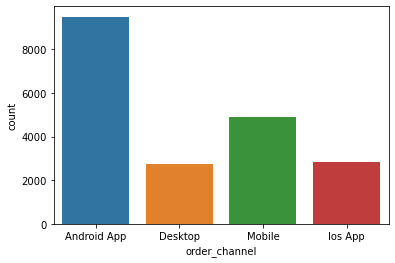

In [23]:
##The distribution of many attributes on different platforms
print(df["order_channel"].value_counts())
sns.countplot(x=df["order_channel"])

In [43]:
# People generally prefer Android App while shopping
df.groupby("order_channel").agg({"master_id":"count",
                                 "omnichannel_total_order_num":"sum",
                                 "omnichannel_total_customer_value":"sum"})

,master_id,omnichannel_total_order_num,omnichannel_total_customer_value
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


<AxesSubplot:xlabel='order_channel', ylabel='omnichannel_total_order_num'>

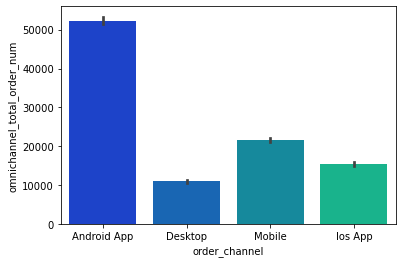

In [44]:
sns.barplot(data=df,x="order_channel",y="omnichannel_total_order_num",estimator=sum, palette="winter")

In [49]:
# Sorting the customers based on their number of shopping
df.sort_values("omnichannel_total_order_num", ascending=False).head(10)[["master_id","omnichannel_total_order_num"]]

,master_id,omnichannel_total_order_num
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,131.000
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.000
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.000
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,82.000
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.000
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,75.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,70.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,70.000


In [50]:
# Let's see the top 10 customers with the highest value
df.sort_values("omnichannel_total_customer_value", ascending=False).head(10)[["master_id", "omnichannel_total_customer_value"]]

,master_id,omnichannel_total_customer_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.290
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.410
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.340
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.150


# Functionalization of Data Preparation

In [51]:
def prep_data_rfm(df, csv=False):
    #Turning columns which contains date string into datetime datatype. They were object at the beginning!
    date_columns = [col for col in df.columns if "date" in col]
    df[date_columns] = df[date_columns].apply(pd.to_datetime)
    #Creating two new variables representing the sum of online and offline purchase both in respect to frequency and value created
    df["omnichannel_total_order_num"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    df["omnichannel_total_customer_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
    return df

In [54]:
prep_data_rfm(df)
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omnichannel_total_order_num,omnichannel_total_customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


# Now our data is ready for setting up RFM metrics

*Recency: It's related to customer's last interaction with the company. How recent was the customer's last interaction.

*Frequency: It represent the number of interactions between customer and the company has made so far.

*Monetary: It represents the monetary contribution of the customer to the company through these interactions.

In [56]:
# We need to define an analyse date to compute recency metric. 
# Analyse date should be at least two days later than the last purchase date.
df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021, 6, 1)

In [57]:
rfm = df.groupby("master_id").agg({"last_order_date": lambda last_order_date: (analysis_date - last_order_date.max()).days,
                                    "omnichannel_total_order_num": lambda omnichannel_total_order_num: omnichannel_total_order_num,
                                    "omnichannel_total_customer_value": lambda omnichannel_total_customer_value: omnichannel_total_customer_value})

In [58]:
# Without scaling these numbers do not give insights about the customers. We must scale them
# so that even the outliers will become interpretable.
rfm.columns=["recency","frequency","monetary"]
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330


# Creating RFM Scores

In [59]:
# Firstly, let's start with why we turn metrics into scalable scores:
## RFM Metrics are hard to interpret without scoring them into a group since
## if we try to observe one observation we will just see a number and nothing else to compare.
## RFM Score tackles this problem by scoring them based on the percentage they take place in.
## When we see a recency score of 5 we will know regardless of looking other observations that
## this observation has high score on recency and a purchase made recently.

In [60]:
                                                                        
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5


In [61]:
# Combining recency_score and frequency_score into one variable called RF_Score
rfm["RF_Score"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54


# Segmentation based on RF Scores

In [62]:
# Firstly, we should define segments for RF Scores
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


In [64]:
# Creating a new variable called segment and placing customers into segments they belong to
rfm["segment"] = rfm["RF_Score"].replace(seg_map, regex=True)
rfm.head(5)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54,champions


In [66]:
# Comprehensive Analysis of Customer Segments
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["sum", "mean"])

# Frequency is highly related to monetary since the more you go shopping the more you will spend.
# Can't loose segment is a cruical customer group we need to be aware of. 
# They consist of a big part of our revenue therefore some actions must be to keep them.

recency         frequency           monetary         
                        sum    mean       sum   mean         sum     mean
segment                                                                  
about_to_sleep       187354 114.032  3954.000  2.407  594189.920  361.649
at_Risk              763821 242.329 14090.000  4.470 2043520.520  648.325
cant_loose           280780 235.159 12796.000 10.717 1769093.020 1481.652
champions             32913  17.142 17213.000  8.965 2708561.160 1410.709
hibernating          888013 247.426  8583.000  2.391 1301311.460  362.583
loyal_customers      278633  82.558 28203.000  8.356 4104868.130 1216.257
need_attention        91108 113.037  3014.000  3.739  446069.930  553.437
new_customers         12098  17.976  1346.000  2.000  231545.310  344.049
potential_loyalists  107844  36.870  9684.000  3.311 1561193.430  533.741
promising             39208  58.695  1336.000  2.000  223214.430  334.153

In [69]:
# FLO wants to add new shoe brand for woman and they need a special group for communication with them.
# This special group consist loyal customers and customer that buy by women categories.

# Firstly, we should add category columns in our new dataframe.
rfm = pd.merge(rfm,df[["master_id","interested_in_categories_12"]],on="master_id", how='left')
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,segment,interested_in_categories_12_x,interested_in_categories_12_y,interested_in_categories_12
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54,champions,"[ERKEK, COCUK, AKTIFSPOR]","[ERKEK, COCUK, AKTIFSPOR]","[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12,hibernating,"[ERKEK, KADIN]","[ERKEK, KADIN]","[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]","[AKTIFCOCUK, AKTIFSPOR]","[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]","[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]","[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54,champions,"[ERKEK, AKTIFSPOR]","[ERKEK, AKTIFSPOR]","[ERKEK, AKTIFSPOR]"


In [70]:
# Secondly, we should get the master_id's.
new_customers_1 = rfm.loc[(rfm["segment"].eq("champions") | rfm["segment"].eq("loyal_customers")) & (rfm.interested_in_categories_12.str.contains("KADIN")), "master_id"]
new_customers_1 = new_customers_1.reset_index(drop=True)
new_customers_1.head()

0    000c1fe2-a8b7-11ea-8479-000d3a38a36f
1    003903e0-abce-11e9-a2fc-000d3a38a36f
2    004bec18-9f7a-11e9-a2fc-000d3a38a36f
3    00534fe4-a6b4-11e9-a2fc-000d3a38a36f
4    009293fe-1f3e-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object

In [71]:
# Transforming dataframe to csv
new_customers_1.to_csv("new_customers_1.csv")

In [73]:
# FLO wants to give a discount in men and children categories.
# Their target group cant_loose, hibernating and new_customers.

# Creating a new dataframe and appointing these customer id's. After that this dataframe will be transformed to a csv file.
new_customers_2 = rfm.loc[(rfm["segment"].eq("cant_loose") | rfm["segment"].eq("hibernating") | rfm["segment"].eq("new_customers")) & (rfm.interested_in_categories_12.str.contains("ERKEK|COCUK")), "master_id"]
new_customers_2 = new_customers_2.reset_index(drop=True)
new_customers_2.head()

0    00034aaa-a838-11e9-a2fc-000d3a38a36f
1    00263f1a-210a-11ea-b50a-000d3a38a36f
2    0033f078-7359-11ea-92d0-000d3a38a36f
3    006bb20e-a9a8-11e9-a2fc-000d3a38a36f
4    007cdfe4-1f54-11ea-87bf-000d3a38a36f
Name: master_id, dtype: object

In [74]:
# Transforming dataframe to csv
new_customers_2.to_csv("new_customers_2.csv")